In [ ]:
#import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

#Libraries requried for classification
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
from sklearn.preprocessing import RobustScaler
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV

In [ ]:
#load the data
customer_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [ ]:
#verify the loading of the data
customer_df.head()

In [ ]:
#information about the data set
customer_df.info()

Totally there are **5000 records** each with **14 columns**.

From the attribute information given in the dataset and the above checks, we can infer the following

**Column to Ignore :** Id column will not be of any use for analysis or prediction , we can straight away drop it.

**Continous variable :** Age, Experience , Income , CCAvg ,Mortgage 

**Categorical variable :** ZIP Code , Family ,Education ,Securities Account, CD Account, Online , CreditCard 

**Target variable :** Personal Loan

**One-hot-coding required :** Family,Education

ZIP Code has to be analysed if it could provide any useful information in grouping the customer to particular region. If not , we can drop that column as well.

As the data types aren clearly defined and the number of records equal the number of non-null records for every column **No missing values are present**

# Cleaning Data

In [ ]:
#drop id column
customer_df.drop('ID' , axis=1, inplace=True)

In [165]:
customer_df.head() #verify the dropping of ID column

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,25,1,49,1.6,0,0,1,0,0,0,0,0,0,1,1,0,0
1,45,19,34,1.5,0,0,1,0,0,0,0,0,1,0,1,0,0
2,39,15,11,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,35,9,100,2.7,0,0,0,0,0,0,1,0,0,0,0,1,0
4,35,8,45,1.0,0,0,0,0,0,1,0,0,0,1,0,1,0


# Descriptive Analysis

In [7]:
# five point summary of numerical fields
describe = customer_df.describe()
describe[['Age', 'Experience' , 'Income' , 'CCAvg' , 'Mortgage']].T # selecting only continous variables

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


**Observations :**

- **Age :** 

Minimum age starts at 23 , looks logical , minor accounts are not present in the data set.
Maximum age is 67 , which means senior citizen above 67 are not considered in the data set.
Looking at the IQR ,the age data looks uniformly distributed.
- **Experience :** 

Minimum value is -3 which means the experience data may be corrupted. Analysis has to be done on the negative values.

- **Income :**

The Income mean is different from the 50th percentile which indicates the data is positively skewed.
The standard deviation looks high.
The max value is 224 indicating outliers in the dataset.

- **CCAvg :**

The minimum value is zero which seems logical as there may be customers without credit card.
The max value is 10 and the std is 1.74 indicating outliers and skewness of data.


- **Mortgage :**

The mean is 56 and 50th percentile is 0 indicating high skewness of the data.
50th percentile is 0 meaning that most of the customers are without mortgage.




# Univariate Analysis

In [8]:
#check number of zipcode values present.
customer_df['ZIP Code'].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
92037     54
93943     54
91320     53
91711     52
94025     52
92093     51
90245     50
90024     50
90089     46
91330     46
92121     45
94304     45
94143     37
95051     34
94608     34
92182     32
92028     32
92521     32
95054     31
95814     30
95014     29
94542     27
94301     27
94550     27
93407     26
        ... 
95482      2
91129      2
95307      2
95842      2
91784      2
96094      2
92116      2
94507      2
94575      2
90745      2
93033      2
94019      2
92161      2
91941      2
94116      2
95816      2
91326      2
92705      2
94604      2
90813      1
94404      1
94965      1
9307       1
91024      1
92694      1
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64

**Observation:**

Zip code is clearly a categorical field.
The number of zip code values are more to create one hot coding.It may affect the performance.
we dont have more information on zipcode to split into regions.
so **dropping** that field.



In [9]:
#drop zip code as it would mislead the algorithms
customer_df.drop('ZIP Code' , axis=1, inplace=True)
customer_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


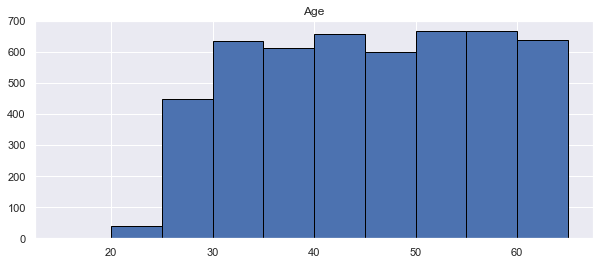

In [10]:
# distribution for age
customer_df.hist(column = ['Age'], edgecolor = 'black',bins =np.arange(15,70,5) , figsize=(10,4))
plt.show()

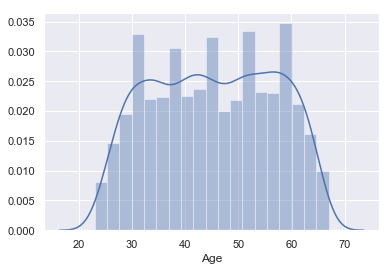

In [11]:
sns.distplot(customer_df['Age'])

**Observation**

Age looks uniformly distributed. 
If this data represents the population data, then there are very few customers in the range of 20 to 25.

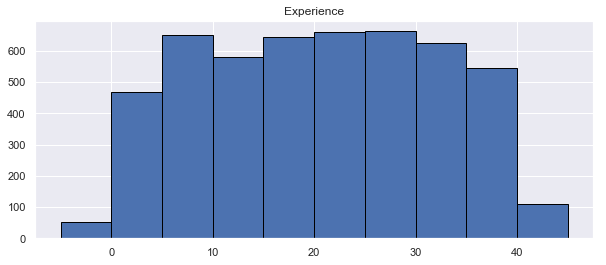

In [12]:
# distribution for Experience
customer_df.hist(column = ['Experience'], edgecolor = 'black',bins =np.arange(-5,50,5) , figsize=(10,4))
plt.show()

There are few customers whose experience has been marked as negative.Otherwise the data looks normal.
Let us check those records.

In [13]:
customer_df[customer_df['Experience'] < 0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,2,7.20,1,0,0,1,0,0,1


we could not find any pattern in the above records . But we can see all of them have Income and age range in 20s.
Let us **impute this by changing the negative value to positive**.


# Imputing Data

In [14]:
#convert negative values into positive values
customer_df['Experience'] = customer_df['Experience'].abs()

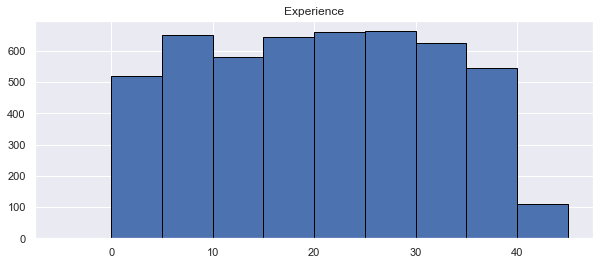

In [15]:
# distribution for Experience after imputing
customer_df.hist(column = ['Experience'], edgecolor = 'black',bins =np.arange(-5,50,5) , figsize=(10,4))
plt.show()

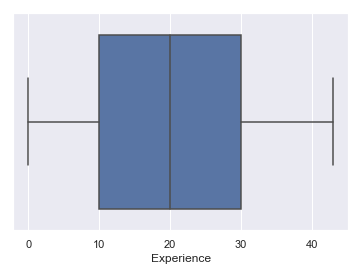

In [16]:
#Now checking for outliers in the experience data
sns.boxplot(customer_df['Experience'])

Experience data has no outliers. The distribution looks normal.

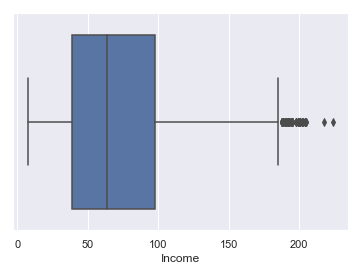

In [17]:
#Now checking for outliers in the Income data
sns.boxplot(customer_df['Income'])

The data looks **positively skewed**.Lets check the data on the right side of the whiskers.

In [18]:
customer_df[customer_df['Income'] > 200]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
526,26,2,205,1,6.33,1,271,0,0,0,0,1
677,46,21,204,2,2.80,1,0,0,0,0,1,0
787,45,15,202,3,10.00,3,0,1,0,0,0,0
1711,27,3,201,1,6.33,1,158,0,0,0,1,0
1901,43,19,201,2,6.67,1,0,0,1,0,1,0
2101,35,5,203,1,10.00,3,0,1,0,0,0,0
2278,30,4,204,2,4.50,1,0,0,0,0,1,0
2337,43,16,201,1,10.00,2,0,1,0,0,0,1
2447,44,19,201,2,8.80,1,0,0,0,0,1,1
2988,46,21,205,2,8.80,1,181,0,1,0,1,0


The customers with the high income are the ones with higher experience and age . 
So these outliers look logical.

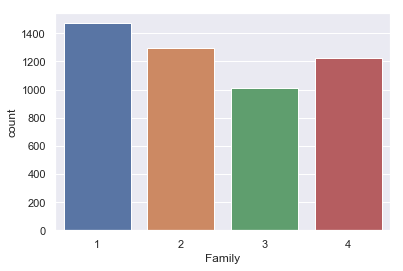

In [19]:
sns.countplot(customer_df['Family']) # distribution for the family data

The family distribution looks logical. we need to do one-hot-coding for this category.
Let us do some multivariate analysis before converting.

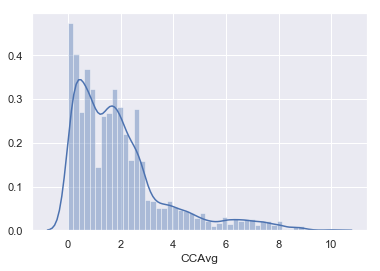

In [20]:
sns.distplot(customer_df['CCAvg']) # distribution for the CCAvg data

The mode is zero indicating that there may be many customers without credit cards . 

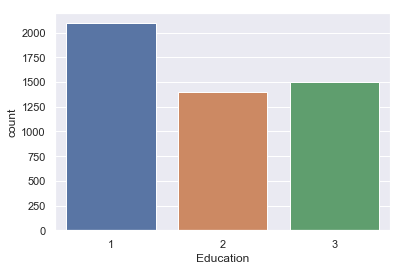

In [21]:
sns.countplot(customer_df['Education']) # distribution for the Education data

The distribution looks logical. we need to do one-hot-coding for this category. Let us do some multivariate analysis before converting.

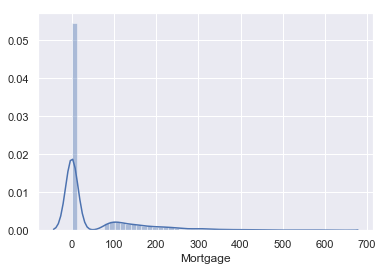

In [22]:
sns.distplot(customer_df['Mortgage']) # distribution for the Mortgage data

The mode is zero indicating that there may be many customers without Mortgage .

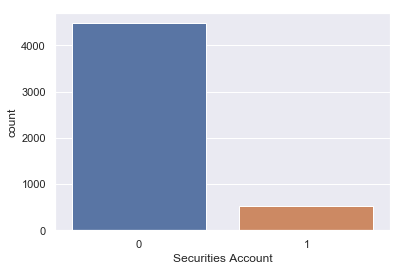

In [23]:
sns.countplot(customer_df['Securities Account']) # distribution for the Securities Account data

Less than one-fourth of the customers hold securities account

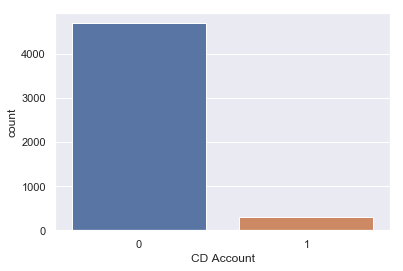

In [24]:
sns.countplot(customer_df['CD Account']) # distribution for the CD Account data

Less than one-fourth of the customers hold Deposit accounts

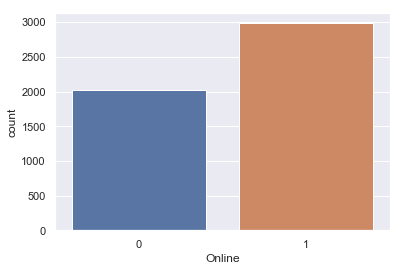

In [25]:
sns.countplot(customer_df['Online']) # distribution for the Online Account data

More than half of the customers hold online account

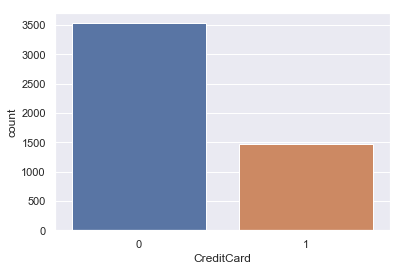

In [26]:
sns.countplot(customer_df['CreditCard']) # distribution for the CreditCard data

only 30 percent of the customers hold Credit card account

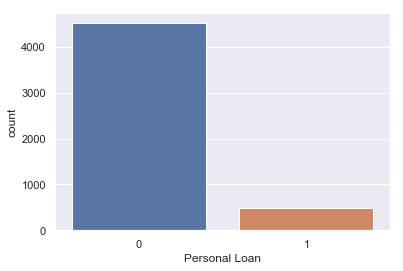

In [27]:
sns.countplot(customer_df['Personal Loan']) # distribution for the Personal Loan data

In [28]:
customer_df['Personal Loan'].value_counts() #counting the class values

0    4520
1     480
Name: Personal Loan, dtype: int64

As mentioned in the dataset description , only 9 percent of the customers opted for personal loan.

Clearly there is **Class Imbalance** problem in this data set.

# Bivariate Analysis

In [29]:
#utility function to group personal loan opted records and plot it as per column
def plot_column_for_PersonalLoan_opted(column):
    loan_Preference = customer_df[column].groupby(customer_df["Personal Loan"])
    hist =  loan_Preference.get_group(1).hist()
    hist.set_xlabel(column)
    plt.show()

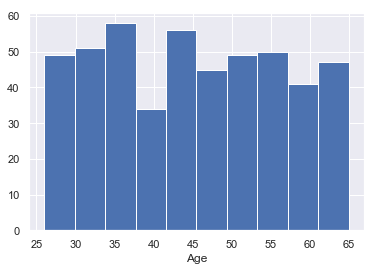

In [30]:
plot_column_for_PersonalLoan_opted('Age') #plot the age of customers who opted for personal loan

The customers who opted for loan are not in any particular age group.
They are distributed uniformly over all age group

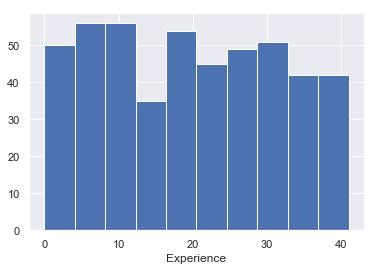

In [31]:
plot_column_for_PersonalLoan_opted('Experience') #plot the Experience of customers who opted for personal loan

The customers who opted for loan are not in any particular Experience group. They are distributed uniformly over all age group

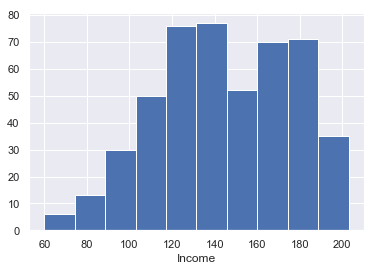

In [32]:
#plot the Income of customers who opted for personal loan
grouped_data = plot_column_for_PersonalLoan_opted('Income') 

We can observe that the customers with **high income have higher chance of getting the loan.**
Especially the customers above 120 income are our target customers for campaign.

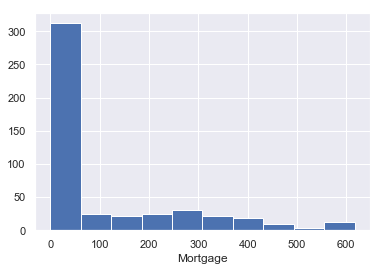

In [33]:
plot_column_for_PersonalLoan_opted('Mortgage') #plot the Mortgage of customers who opted for personal loan

Out of the  480 customers who opted for personal loan ,more than 300 customers dont have mortgage .

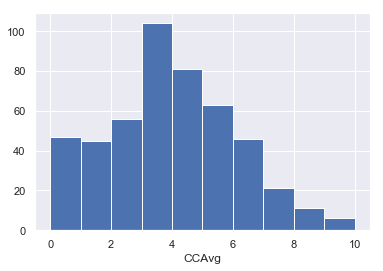

In [34]:
plot_column_for_PersonalLoan_opted('CCAvg') #plot the CCAvg of customers who opted for personal loan

The customers who opted for personal have normal distribution over CCAvg data.

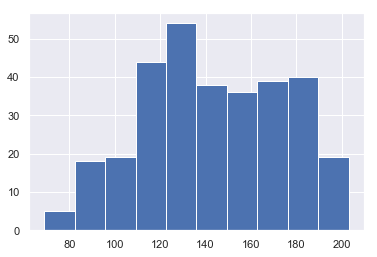

In [35]:
# Let us verify if there are patterns between customers who dont have Mortgage and high income.

grouped_by_Loan_Preference = customer_df.groupby(customer_df["Personal Loan"]) #group by personal loan
opted_group = grouped_by_Loan_Preference.get_group(1) #get loan opted group
personal_loan_no_mortgage = opted_group[opted_group['Mortgage'] == 0] #filter the customers with no mortgage
personal_loan_no_mortgage['Income'].hist() #plot income of customers with no mortgage and opted personal loan

This graph looks almost similar to the graph we have seen only with income group.
This clearly represents that

<font color=green size=3>**"Customers with high income and no mortgage have high chance of getting loan"**<font>

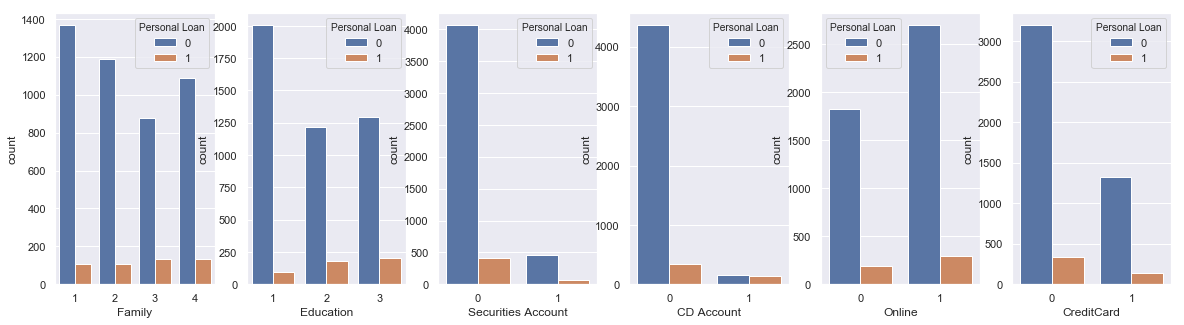

In [36]:
#plot the categorical variables against target column

categorical_variables = ['Family','Education','Securities Account', 'CD Account','Online','CreditCard']
figure, axes= plt.subplots(1, 6, figsize=(20, 5))

#iterate all the Categorical columns and plot against target column
for idx_colnum in range(len(categorical_variables)): 
    sns.countplot(x=categorical_variables[idx_colnum] , data=customer_df , hue = 'Personal Loan',ax=axes[idx_colnum] )
    


***Observations***

- **Family:** no Linear seperation between classes of target variable.
- **Education:** customers with higher education have high chance for opting personal loan. we need to check if it is corelated with Income.
- **Securities Account:** Customers without securities account has bought personal loan more than customers with securities account .**Customers with securities account are not our target customers** . 
- **CD Account** : Though the number of customers without deposit account have personal loans than the ones with deposit accounts , it is interesting to see that **almost all the customers with CD account have personal loan**.This may be due to the reason the banks accept CD account as collateral and offer higher amount for personal loan.
- **Online:** no Linear seperation between classes of target variable.
- **CreditCard** no Linear seperation between classes of target variable.

<font color=green size=3>**"Customers with higher education or with CD account have high chance of getting loan"**<font>

In [37]:
# convert the datatype of categorical variables as category

for feature in categorical_variables:
    customer_df[feature] = customer_df[feature].astype('category') 

customer_df['Personal Loan'] = customer_df['Personal Loan'].astype('category')# convert target variable datatype


#verify the info to check the change of datatype
customer_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null category
CCAvg                 5000 non-null float64
Education             5000 non-null category
Mortgage              5000 non-null int64
Personal Loan         5000 non-null category
Securities Account    5000 non-null category
CD Account            5000 non-null category
Online                5000 non-null category
CreditCard            5000 non-null category
dtypes: category(7), float64(1), int64(4)
memory usage: 230.3 KB


In [38]:
#One-hot-coding of categorical variables : the categorical variables must be in the value of 0 or 1 .
#Otherwise the algorithms will consider them as weighted values instead of categories
#Only Family , Education have the values other than 0 or 1
categories_to_swap = ['Family', 'Education'] 
#pandas get dummies function does one hot coding 
temp_df = pd.get_dummies(customer_df[categories_to_swap], prefix=categories_to_swap) 
temp_df.head()


,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,0,0,0,1,1,0,0
1,0,0,1,0,1,0,0
2,1,0,0,0,1,0,0
3,1,0,0,0,0,1,0
4,0,0,0,1,0,1,0


In [39]:
#dropping the irrelavnt original features and concatenating the actual categoricals #
customer_df.drop(categories_to_swap, axis=1, inplace=True)
customer_df = pd.concat([customer_df, temp_df], axis=1)
customer_df.head()

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,25,1,49,1.6,0,0,1,0,0,0,0,0,0,1,1,0,0
1,45,19,34,1.5,0,0,1,0,0,0,0,0,1,0,1,0,0
2,39,15,11,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,35,9,100,2.7,0,0,0,0,0,0,1,0,0,0,0,1,0
4,35,8,45,1.0,0,0,0,0,0,1,0,0,0,1,0,1,0


In [92]:
categorical_variables = ['Family_1','Family_2','Family_3', 'Family_4','Education_1','Education_2' , 'Education_3']
for feature in categorical_variables:
    customer_df[feature] = customer_df[feature].astype('category')

In [93]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
CCAvg                 5000 non-null float64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null category
Securities Account    5000 non-null category
CD Account            5000 non-null category
Online                5000 non-null category
CreditCard            5000 non-null category
Family_1              5000 non-null category
Family_2              5000 non-null category
Family_3              5000 non-null category
Family_4              5000 non-null category
Education_1           5000 non-null category
Education_2           5000 non-null category
Education_3           5000 non-null category
dtypes: category(12), float64(1), int64(4)
memory usage: 255.1 KB


# Prediction

# Iteration 1 : Using the data as given

In [94]:
def cross_validation_scores(model , X_train, y_train):
    """Gives the cross validation Accurancy mean and standard deviation"""
    
    accuracies_lr= cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10) 
    accuracies_lr_mean=accuracies_lr.mean()*100
    print("Mean Accuracy for cross validation = ",accuracies_lr_mean)

    accuracies_lr_std=accuracies_lr.std()*100
    print("Standard Deviation for cross validation = ",accuracies_lr_std)

In [95]:
def get_auc_roc_score(model, X_train, y_train) :
    """Gives the Auc Roc Scores from cross validation"""
    
    mean_roc_auc_score = cross_val_score(estimator = model, X = X_train, y = y_train, scoring="roc_auc", cv = 7).mean()
    std_roc_auc_score = cross_val_score(estimator = model, X = X_train, y = y_train, scoring="roc_auc", cv = 7).std()

    print("Mean AUC ROC Score:",mean_roc_auc_score)
    print("Std Dev AUC ROC Score:",std_roc_auc_score)


In [96]:
def train_classifier(classifier, X_train, X_test, y_train, y_test):
    """Trains the classifier algorithm , cross validates and prints the results"""
    
    classifier.fit(X_train,y_train) # train model
    y_pred=classifier.predict(X_test) # test model
    test_score = classifier.score(X_test, y_test) # get testing score
    train_score = classifier.score(X_train,y_train) # get training score
    print("training score = " ,train_score)
    print("testing score = " ,test_score)
    
    cross_validation_scores(classifier , X_train, y_train) # get cross validation scores
    get_auc_roc_score(classifier , X_train, y_train) # get auc_roc scores
    

In [97]:
#List of classifiers algorithms to try
classifiers = [
    LogisticRegression(solver='liblinear'),
    KNeighborsClassifier(n_neighbors=3),
    SVC(kernel="rbf", C=0.025, probability=True, gamma = 0.025),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators = 10),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    ]


In [98]:
#utility method to iterate over all the algorithms
def train_and_print_training_scores(X_train, X_test, y_train, y_test):

    for classifier in classifiers: #iterate through all classifiers
        name = classifier.__class__.__name__ # get the classifier name
    
        print("="*30)
        print(name)
    
        print('****Results****')
        
        train_classifier(classifier, X_train, X_test, y_train, y_test) # train the model
        
        

In [99]:
def print_classification_report_loan_class(X_train, X_test, y_train, y_test):
    
    # Logging for Visual Comparison
    log_cols=["Classifier", "FN", "TP" , "Precision" , "Recall" , "F1_score"]
    log = pd.DataFrame(columns=log_cols)
    
    for classifier in classifiers: #iterate through all classifiers
        name = classifier.__class__.__name__ # get the classifier name
        classifier.fit(X_train,y_train) # train model
        y_pred=classifier.predict(X_test) # test model
        
        label_for_loan = [1]
        
        confusion_mat = confusion_matrix(y_test,y_pred) #get the confusion matrix
        precision = metrics.precision_score(y_test, y_pred, average='weighted', labels=label_for_loan)
        recall = metrics.recall_score(y_test, y_pred, average='weighted', labels=label_for_loan)
        f1_score = metrics.f1_score(y_test, y_pred, average='weighted', labels=label_for_loan)


        False_Negative  = confusion_mat[1,0]
        True_Positive = confusion_mat[1,1]
        
        log_entry = pd.DataFrame([[name, False_Negative, True_Positive ,precision ,recall ,f1_score ]], columns=log_cols)
        log = log.append(log_entry)
   
    
    print(log.sort_values(by=['F1_score'], ascending=False))

In [100]:
X = customer_df.drop('Personal Loan', axis=1) 
y = customer_df['Personal Loan']

In [101]:
X.shape

(5000, 16)

In [102]:
# split the data for training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

In [103]:
#train the given set of classifiers and print the results
train_and_print_training_scores(X_train, X_test, y_train, y_test)

LogisticRegression
****Results****
training score =  0.9611111111111111
testing score =  0.958
Mean Accuracy for cross validation =  96.08867621294152
Standard Deviation for cross validation =  0.7327042818300545
Mean AUC ROC Score: 0.9627411421875492
Std Dev AUC ROC Score: 0.007903753650356567
KNeighborsClassifier
****Results****
training score =  0.9526666666666667
testing score =  0.912
Mean Accuracy for cross validation =  90.31122139972159
Standard Deviation for cross validation =  0.7771539226678478
Mean AUC ROC Score: 0.8345787768666179
Std Dev AUC ROC Score: 0.027988899363599332
SVC
****Results****
training score =  0.9031111111111111
testing score =  0.912
Mean Accuracy for cross validation =  90.31127045346177
Standard Deviation for cross validation =  0.09170189067060672
Mean AUC ROC Score: 0.8773679185393168
Std Dev AUC ROC Score: 0.01628669143650802
DecisionTreeClassifier
****Results****
training score =  1.0
testing score =  0.984
Mean Accuracy for cross validation =  98.

In [104]:
print_classification_report_loan_class(X_train, X_test, y_train, y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


                   Classifier  FN  TP  Precision    Recall  F1_score
0      DecisionTreeClassifier   5  39   0.951220  0.886364  0.917647
0  GradientBoostingClassifier   5  39   0.951220  0.886364  0.917647
0      RandomForestClassifier   6  38   0.950000  0.863636  0.904762
0          AdaBoostClassifier  10  34   0.850000  0.772727  0.809524
0          LogisticRegression  17  27   0.870968  0.613636  0.720000
0        KNeighborsClassifier  25  19   0.500000  0.431818  0.463415
0                         SVC  44   0   0.000000  0.000000  0.000000


**Model Evaluation from Iteration 1***

- All the algorithms are giving very good accuracy due to class imbalance.
- In this business case , we should be able to reach maximum number of customers who have the potential to get personal loan , so False Negatives and True Positives are the important criteria to be verified.
- In this first attempt ,DecisionTreeClassifier has the best F1 score.
- The training and testing scores are good for all algorithms.
- The standard deviation of the cross validation looks very high.

# Iteration 2 : scaling of continuous data

In [119]:
def scale_continous_features(X_df):
    """ scale the continous features"""
    
    continous_features = ['Age','Experience', 'Income', 'CCAvg', 'Mortgage']

    copy_X = X_df[continous_features].copy() # create copy not to corrupt the original data
    
    f_scale = RobustScaler().fit(copy_X[continous_features].values) # using robust scaler 
    copy_X[continous_features] = f_scale.transform(copy_X[continous_features].values)
    scaled_X_df = X_df.copy()
    scaled_X_df.drop(continous_features, axis=1, inplace=True)
    scaled_X_df = pd.concat([scaled_X_df, copy_X], axis=1) 
    return scaled_X_df


In [123]:
X_train_scaled = scale_continous_features(X_train)  # scaling the training set 
X_test_scaled = scale_continous_features(X_test) # scaling the testing set

In [124]:
train_and_print_training_scores(X_train_scaled, X_test_scaled, y_train, y_test)

LogisticRegression
****Results****
training score =  0.9597777777777777
testing score =  0.96
Mean Accuracy for cross validation =  95.82195917565575
Standard Deviation for cross validation =  0.7305099962542904
Mean AUC ROC Score: 0.963688638330893
Std Dev AUC ROC Score: 0.008642688592408708
KNeighborsClassifier
****Results****
training score =  0.978
testing score =  0.97
Mean Accuracy for cross validation =  96.22314612253231
Standard Deviation for cross validation =  0.7194031663597091
Mean AUC ROC Score: 0.9136030833543444
Std Dev AUC ROC Score: 0.026852478037188016
SVC
****Results****
training score =  0.9031111111111111
testing score =  0.912
Mean Accuracy for cross validation =  90.31127045346177
Standard Deviation for cross validation =  0.09170189067060672
Mean AUC ROC Score: 0.9694219537144482
Std Dev AUC ROC Score: 0.00989290465689901
DecisionTreeClassifier
****Results****
training score =  1.0
testing score =  0.97
Mean Accuracy for cross validation =  98.08937569513375
St

In [125]:
print_classification_report_loan_class(X_train_scaled, X_test_scaled, y_train, y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


                   Classifier  FN  TP  Precision    Recall  F1_score
0      RandomForestClassifier   3  41   0.872340  0.931818  0.901099
0  GradientBoostingClassifier   4  40   0.833333  0.909091  0.869565
0      DecisionTreeClassifier   5  39   0.812500  0.886364  0.847826
0        KNeighborsClassifier  12  32   0.914286  0.727273  0.810127
0          LogisticRegression  11  33   0.785714  0.750000  0.767442
0          AdaBoostClassifier  12  32   0.761905  0.727273  0.744186
0                         SVC  44   0   0.000000  0.000000  0.000000


***model evaluation***

- the metrics such as Recall , precision , F1_score has gone down after the scaling.
- even the accuracies have dropped.
- GradientBoostingClassifier is performing consistently well
- the standard deviation of the cross validation still remains high


# Iteration 3: Feature Selection with Correlation matrix

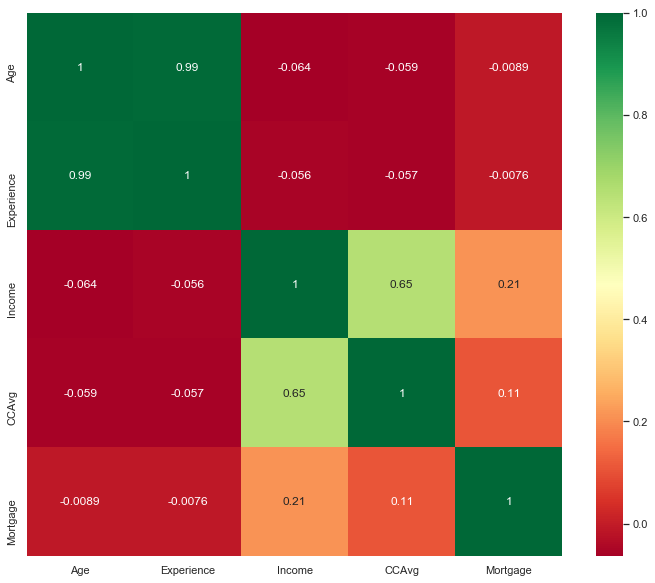

In [127]:
corr = X_train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,cmap ='RdYlGn')
plt.show()

From the above heat map we can see that Age and experience has high correlation.
Let us leave the 'Age' Column and try to check the performance.

In [128]:
X_train_removed_multicolinearity = X_train.copy()
X_train_removed_multicolinearity.drop('Age', axis=1, inplace=True)
X_test_removed_multicolinearity = X_test.copy()
X_test_removed_multicolinearity.drop('Age', axis=1, inplace=True)
X_train_removed_multicolinearity.head()

,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
3150,22,124,5.0,0,0,0,0,0,0,0,0,1,0,0,1
4633,5,50,1.5,0,0,0,1,0,1,0,0,0,1,0,0
1783,27,192,1.7,601,0,0,1,0,1,0,0,0,1,0,0
2541,8,171,2.2,569,0,0,1,0,0,1,0,0,0,1,0
2928,6,175,6.7,0,0,0,1,0,0,1,0,0,1,0,0


In [130]:
train_and_print_training_scores(X_train_removed_multicolinearity, X_test_removed_multicolinearity, y_train, y_test)

LogisticRegression
****Results****
training score =  0.9606666666666667
testing score =  0.958
Mean Accuracy for cross validation =  95.93302145250651
Standard Deviation for cross validation =  0.7905019493736642
Mean AUC ROC Score: 0.9637386736741045
Std Dev AUC ROC Score: 0.008412810363497043
KNeighborsClassifier
****Results****
training score =  0.9515555555555556
testing score =  0.92
Mean Accuracy for cross validation =  90.5336424706624
Standard Deviation for cross validation =  1.2054810957627036
Mean AUC ROC Score: 0.8387462096744128
Std Dev AUC ROC Score: 0.036854522034117716
SVC
****Results****
training score =  0.9031111111111111
testing score =  0.912
Mean Accuracy for cross validation =  90.31127045346177
Standard Deviation for cross validation =  0.09170189067060672
Mean AUC ROC Score: 0.8893724852223327
Std Dev AUC ROC Score: 0.01613907779904296
DecisionTreeClassifier
****Results****
training score =  1.0
testing score =  0.986
Mean Accuracy for cross validation =  98.11

In [132]:
print_classification_report_loan_class(X_train_removed_multicolinearity, X_test_removed_multicolinearity, y_train, y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


                   Classifier  FN  TP  Precision    Recall  F1_score
0  GradientBoostingClassifier   5  39   0.951220  0.886364  0.917647
0      RandomForestClassifier   7  37   0.973684  0.840909  0.902439
0      DecisionTreeClassifier   7  37   0.925000  0.840909  0.880952
0          AdaBoostClassifier   9  35   0.875000  0.795455  0.833333
0          LogisticRegression  17  27   0.870968  0.613636  0.720000
0        KNeighborsClassifier  24  20   0.555556  0.454545  0.500000
0                         SVC  44   0   0.000000  0.000000  0.000000


***Model Evaluation ***

Not much difference after removing the age column

# Iteration 4 : Upsampling by resample

In [134]:
customer_df_copy = customer_df.copy()
df_majority=customer_df[customer_df_copy['Personal Loan']==0] ## all rows where Not.fully.paid==0
df_minority=customer_df[customer_df_copy['Personal Loan']==1] ## all rows where Not.fully.paid==1

df_minority_upsampled=resample(df_minority,replace=True,n_samples=8045)
df_upsampled=pd.concat([df_minority_upsampled,df_majority])

df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12565 entries, 4308 to 4999
Data columns (total 17 columns):
Age                   12565 non-null int64
Experience            12565 non-null int64
Income                12565 non-null int64
CCAvg                 12565 non-null float64
Mortgage              12565 non-null int64
Personal Loan         12565 non-null category
Securities Account    12565 non-null category
CD Account            12565 non-null category
Online                12565 non-null category
CreditCard            12565 non-null category
Family_1              12565 non-null category
Family_2              12565 non-null category
Family_3              12565 non-null category
Family_4              12565 non-null category
Education_1           12565 non-null category
Education_2           12565 non-null category
Education_3           12565 non-null category
dtypes: category(12), float64(1), int64(4)
memory usage: 737.4 KB


In [149]:
X_upsampled = df_upsampled.drop('Personal Loan', axis=1) 
y_upsampled = df_upsampled['Personal Loan']
X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled, y_upsampled, test_size=0.40, random_state=1)

In [155]:
train_and_print_training_scores(X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled)

LogisticRegression
****Results****
training score =  0.9141795994163682
testing score =  0.9124552327894946
Mean Accuracy for cross validation =  91.37780129445622
Standard Deviation for cross validation =  0.9827113171887591
Mean AUC ROC Score: 0.965099604768566
Std Dev AUC ROC Score: 0.005926723283158991
KNeighborsClassifier
****Results****
training score =  0.9738692134235309
testing score =  0.955033824114604
Mean Accuracy for cross validation =  95.60936908294589
Standard Deviation for cross validation =  0.3495611938969813
Mean AUC ROC Score: 0.9614942274351463
Std Dev AUC ROC Score: 0.0028192750113951275
SVC
****Results****
training score =  0.7705265950391299
testing score =  0.7598487863111818
Mean Accuracy for cross validation =  73.51085294087525
Standard Deviation for cross validation =  1.072237898180586
Mean AUC ROC Score: 0.9630838026034321
Std Dev AUC ROC Score: 0.0017858483810520313
DecisionTreeClassifier
****Results****
training score =  1.0
testing score =  0.9964186

In [166]:
print_classification_report_loan_class(X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled)

                   Classifier   FN    TP  Precision    Recall  F1_score
0      RandomForestClassifier    0  3230   0.996299  1.000000  0.998146
0      DecisionTreeClassifier    0  3230   0.994764  1.000000  0.997375
0  GradientBoostingClassifier    0  3230   0.982360  1.000000  0.991102
0        KNeighborsClassifier    0  3230   0.934606  1.000000  0.966198
0          AdaBoostClassifier  101  3129   0.941619  0.968731  0.954982
0          LogisticRegression  164  3066   0.917415  0.949226  0.933049
0                         SVC    6  3224   0.728588  0.998142  0.842325


***model Evaluation***

- Metrics such as Precision, Recall , F1 score has improved significantly.
- RandomForestClassifier performs best

# Iteration 5 : Hyper parameter tuning

In [158]:
classifier = RandomForestClassifier(n_estimators=25)
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)] ## play with start and stop

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 20, num = 5)] ## change 10,20 and 2
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,15]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,10]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [20, 65, 110, 155, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 12, 15, 17, 20, None], 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 10], 'bootstrap': [True, False]}


In [159]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid, n_iter = 100, cv = 3, 
                               verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_upsampled,y_train_upsampled)
print("Best Parameters are:",rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   27.3s


Best Parameters are: {'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15, 'bootstrap': False}


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   51.9s finished


In [160]:
best_random = rf_random.best_estimator_
best_random.fit(X_train_upsampled,y_train_upsampled)

predictions = best_random.predict(X_test)


print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[455   1]
 [  0  44]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       0.98      1.00      0.99        44

   micro avg       1.00      1.00      1.00       500
   macro avg       0.99      1.00      0.99       500
weighted avg       1.00      1.00      1.00       500



# Conclusion

***Business conclusion*** : customers with High income , higher level of education , CD account  are the target candidates for campaign

***Prediction Model*** : Random forest swith hyper parameter tuning and Upsampling gives the best result